In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
nb_classes = 10

Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), 
              metrics=['accuracy'])

In [4]:
from keras.datasets import mnist
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), 
              metrics=['accuracy'])
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=20, verbose=1, validation_data=(X_val, Y_val))

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 13s - loss: 2.1787 - acc: 0.2755 - val_loss: 2.0535 - val_acc: 0.43971s - loss: 2.1898 -
Epoch 2/20
45000/45000 [==============================] - 10s - loss: 1.9275 - acc: 0.5927 - val_loss: 1.8051 - val_acc: 0.6825
Epoch 3/20
45000/45000 [==============================] - 10s - loss: 1.6767 - acc: 0.7213 - val_loss: 1.5540 - val_acc: 0.7445
Epoch 4/20
45000/45000 [==============================] - 10s - loss: 1.4306 - acc: 0.7623 - val_loss: 1.3185 - val_acc: 0.7756
Epoch 5/20
45000/45000 [==============================] - 11s - loss: 1.2125 - acc: 0.7883 - val_loss: 1.1214 - val_acc: 0.7999
Epoch 6/20
45000/45000 [==============================] - 11s - loss: 1.0383 - acc: 0.8081 - val_loss: 0.9697 - val_acc: 0.8168
Epoch 7/20
45000/45000 [==============================] - 9s - loss: 0.9069 - acc: 0.8239 - val_loss: 0.8562 - val_acc: 0.8293
Epoch 8/20
45000/45000 [============

In [9]:
from keras.layers.core import Dropout
from keras import backend as K

In [11]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()


Train on 45000 samples, validate on 15000 samples
Epoch 1/4
45000/45000 [==============================] - 11s - loss: 0.3985 - acc: 0.8948 - val_loss: 0.3986 - val_acc: 0.8941
Epoch 2/4
45000/45000 [==============================] - 8s - loss: 0.3919 - acc: 0.8962 - val_loss: 0.3925 - val_acc: 0.8951
Epoch 3/4
45000/45000 [==============================] - 8s - loss: 0.3858 - acc: 0.8973 - val_loss: 0.3866 - val_acc: 0.8962
Epoch 4/4
45000/45000 [==============================] - 8s - loss: 0.3801 - acc: 0.8981 - val_loss: 0.3814 - val_acc: 0.8983


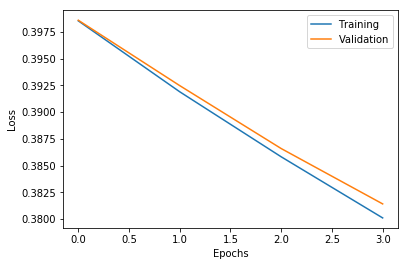

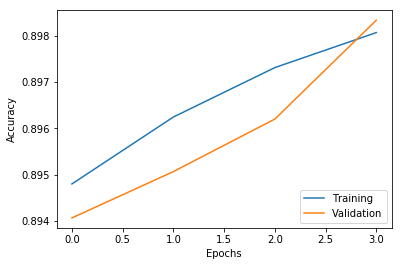

In [12]:
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=4, verbose=1, validation_data=(X_val, Y_val))
plot_history(network_history)

In [14]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=1)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(), 
              metrics=['accuracy'])
    
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=20, 
          batch_size=128, verbose=True, callbacks=[early_stop]) 

Train on 45000 samples, validate on 10000 samples
Epoch 1/20
45000/45000 [==============================] - 13s - loss: 1.4392 - acc: 0.6252 - val_loss: 0.7031 - val_acc: 0.8373
Epoch 2/20
45000/45000 [==============================] - 9s - loss: 0.6412 - acc: 0.8267 - val_loss: 0.4437 - val_acc: 0.8863
Epoch 3/20
45000/45000 [==============================] - 9s - loss: 0.4872 - acc: 0.8597 - val_loss: 0.3645 - val_acc: 0.9024
Epoch 4/20
45000/45000 [==============================] - 9s - loss: 0.4202 - acc: 0.8785 - val_loss: 0.3263 - val_acc: 0.9119
Epoch 5/20
45000/45000 [==============================] - 9s - loss: 0.3794 - acc: 0.8914 - val_loss: 0.3012 - val_acc: 0.9153
Epoch 6/20
45000/45000 [==============================] - 9s - loss: 0.3538 - acc: 0.8971 - val_loss: 0.2816 - val_acc: 0.9220
Epoch 7/20
45000/45000 [==============================] - 9s - loss: 0.3324 - acc: 0.9041 - val_loss: 0.2675 - val_acc: 0.9263
Epoch 8/20
45000/45000 [==============================] - 9s

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_truncated = Sequential()
model_truncated.add(Dense(512, activation='relu', input_shape=(784,)))
model_truncated.add(Dropout(0.2))
model_truncated.add(Dense(512, activation='relu'))

for i, layer in enumerate(model_truncated.layers):
    layer.set_weights(model.layers[i].get_weights())

model_truncated.compile(loss='categorical_crossentropy', optimizer=SGD(), 
              metrics=['accuracy'])

In [17]:
# Check
np.all(model_truncated.layers[0].get_weights()[0] == model.layers[0].get_weights()[0])

True

In [18]:
hidden_features = model_truncated.predict(X_train)

In [19]:
hidden_features.shape

(45000, 512)

In [20]:
X_train.shape

(45000, 784)

In [21]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(hidden_features[:1000]) ## Reduced for computational issues

In [22]:
colors_map = np.argmax(Y_train, axis=1)

In [23]:
X_tsne.shape

(1000, 2)

In [24]:
nb_classes

10

In [31]:
np.where(colors_map==6)

(array([   23,    41,    74, ..., 44975, 44987, 44988], dtype=int64),)

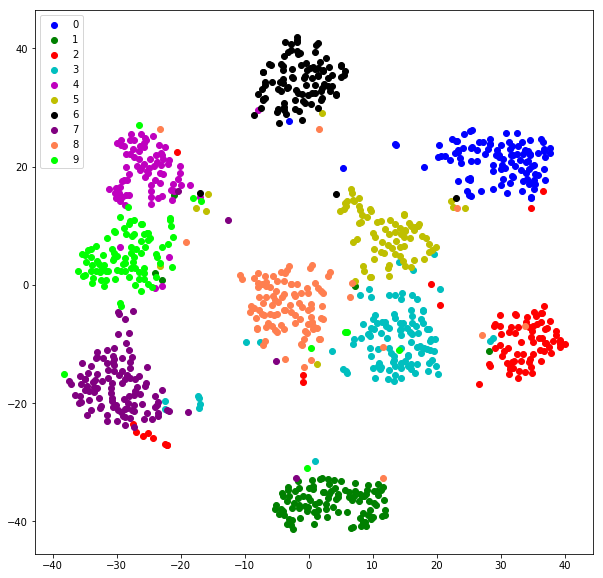

In [25]:
colors = np.array([x for x in 'b-g-r-c-m-y-k-purple-coral-lime'.split('-')])
colors_map = colors_map[:1000]
plt.figure(figsize=(10,10))
for cl in range(nb_classes):
    indices = np.where(colors_map==cl)
    plt.scatter(X_tsne[indices,0], X_tsne[indices, 1], c=colors[cl], label=cl)
plt.legend()
plt.show()